Confusion Matrix:
 [[182  30]
 [ 21 336]]
Precision: 0.9180327868852459
Recall: 0.9411764705882353
F1 Score: 0.9294605809128631
ROC AUC: 0.8998335183129856


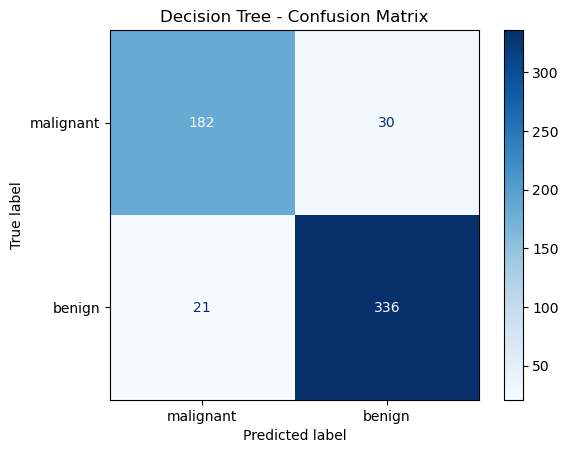

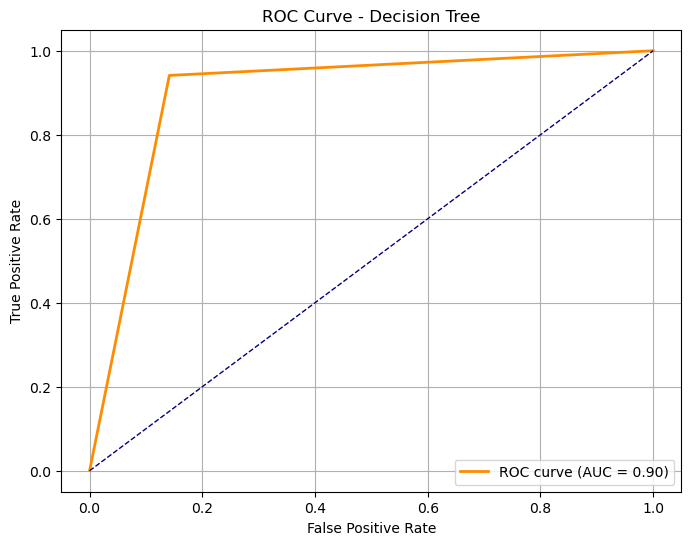

In [1]:
# 1. Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score,
    ConfusionMatrixDisplay, roc_curve, auc
)

# 2. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 3. Initialize Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# 4. Set up Stratified K-Fold for robust CV evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. Get cross-validated predictions (classes and probabilities)
y_pred = cross_val_predict(clf, X, y, cv=cv)
y_prob = cross_val_predict(clf, X, y, cv=cv, method="predict_proba")[:, 1]

# 6. Calculate and print metrics
cm = confusion_matrix(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# 7. Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# 8. Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# 9. Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.grid()
plt.show()
